# Factorización matricial

**Autor**: Arturo Sánchez Palacio

Basado en: https://github.com/lazyprogrammer

**Fecha de última revisión: 17/I/2020**

En este cuaderno emplearemos los siguientes módulos:

In [1]:
import pickle
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

Como ya es habitual comenzamos cargando los datos almacenados en forma de diccionario:

In [2]:
with open('./data/usuario_pelicula.json', 'rb') as f:
  usuario_pelicula = pickle.load(f)

with open('./data/pelicula_usuario.json', 'rb') as f:
  pelicula_usuario = pickle.load(f)

with open('./data/usuariopeli_rating.json', 'rb') as f:
  usuariopeli_rating = pickle.load(f)

with open('./data/usuariopeli_rating_test.json', 'rb') as f:
  usuariopeli_rating_test = pickle.load(f)

De nuevo fijamos los valores de N y M como ya es habitual:

In [3]:
N = np.max(list(usuario_pelicula.keys())) + 1
m_train = np.max(list(pelicula_usuario.keys()))
m_test = np.max([m for (u, m), r in usuariopeli_rating_test.items()])
M = max(m_train, m_test) + 1
print("N:", N, "M:", M)

N: 2500 M: 1000


Inicializamos las variables inicializando las matrices aleatoriamente, los vectores a cero, calculando la media global y eligiendo K (dimensión de la reducción):

#### To do. Inicializar las matrices W y U con números aleatorios, b y c como ceros y calcular mu:

In [4]:
K = 10
W = np.random.rand(N, K)
b = np.zeros(N)
U = np.random.rand(M, K)
c = np.zeros(M)
mu = np.mean(list(usuariopeli_rating.values()))

Recordemos la fórmula de la predicción:

![Formulas prediccion](./media/formula_pred.png)

Definimos una función que calcula la pérdida dado el diccionario usuariopeli_ratings:

In [5]:
def get_loss(d):
    N = float(len(d)) #número de ratings
    sse = 0
    for k, r in d.items():  #iteramos en los ratings
        i, j = k
        p = W[i].dot(U[j]) + b[i] + c[j] + mu #obtenemos nuestra predicción
        sse += (p - r)*(p - r) #calculamos el arror cuadrático
    return sse / N #dividir por N devuelve el error medio cuadrático

Una vez definida la función construimos el bucle de entrenamiento. Comenzamos fijando el número de iteraciones, el coeficiente de regularización e inicializando dos listas para almacenar las pérdidas:

In [6]:
iteraciones = 25
reg =20. 
perdidas_entren = []
perdidas_test = []

__Nota.__ Recordemos las fórmulas de los coeficientes que queremos calcular:

![Formulas regulizacion](./media/formulas_reg.png)

El bucle de entrenamiento itera durante las iteraciones fijadas:

In [7]:
for iteracion in range(iteraciones):
    print("Iteración:", iteracion)
    iteracion_start = datetime.now() #calcular tiempo en cada iteración
  # Actualizamos los parámetros:

  # Actualizar w y b
    t0 = datetime.now()
    for i in range(N):
    #  W
        matrix = np.eye(K) * reg #identidad por coeficiente regulación
        vector = np.zeros(K) #vector de ceros

        # b
        bi = 0
        for j in usuario_pelicula[i]: #ejecutamos el sumatorio
            r = usuariopeli_rating[(i,j)]
            matrix += np.outer(U[j], U[j])
            vector += (r - b[i] - c[j] - mu)*U[j]
            bi += (r - W[i].dot(U[j]) - c[j] - mu)

    # actualizamos los parámetros W y b
        W[i] = np.linalg.solve(matrix, vector)
        b[i] = bi / (len(usuario_pelicula[i]) + reg)

        if i % (N//10) == 0:
            print("i:", i, "N:", N)
    print("W y B actualizados:", datetime.now() - t0)

  # Actualizar U y c
    t0 = datetime.now()
    for j in range(M):
    #  U
        matrix = np.eye(K) * reg
        vector = np.zeros(K)

    # for c
        cj = 0
        try:
            for i in pelicula_usuario[j]:
                r = usuariopeli_rating[(i,j)]
                matrix += np.outer(W[i], W[i])
                vector += (r - b[i] - c[j] - mu)*W[i]
                cj += (r - W[i].dot(U[j]) - b[i] - mu)

      # Actualizamos u y c
            U[j] = np.linalg.solve(matrix, vector)
            c[j] = cj / (len(pelicula_usuario[j]) + reg)

            if j % (M//10) == 0:
                print("j:", j, "M:", M)
        except KeyError:
            # Es posible no tener valoraciones para una película
            pass
    print("Actualizados U y c:", datetime.now() - t0)
    print("Duración iteración:", datetime.now() - iteracion_start)


  # Almacenar pérdida de entrenamiento
    t0 = datetime.now()
    perdidas_entren.append(get_loss(usuariopeli_rating))

  # Almacenar pérdida de test
    perdidas_test.append(get_loss(usuariopeli_rating_test))
    print("Tiempo estimado:", datetime.now() - t0)
    print("Pérdida entrenamiento:", perdidas_entren[-1])
    print("Pérdida test:", perdidas_test[-1])

Iteración: 0
i: 0 N: 2500
i: 250 N: 2500
i: 500 N: 2500
i: 750 N: 2500
i: 1000 N: 2500
i: 1250 N: 2500
i: 1500 N: 2500
i: 1750 N: 2500
i: 2000 N: 2500
i: 2250 N: 2500
W y B actualizados: 0:00:14.434021
j: 0 M: 1000
j: 100 M: 1000
j: 200 M: 1000
j: 300 M: 1000
j: 400 M: 1000
j: 500 M: 1000
j: 600 M: 1000
j: 700 M: 1000
j: 800 M: 1000
j: 900 M: 1000
Actualizados U y c: 0:00:14.088269
Duración iteración: 0:00:28.522290
Tiempo estimado: 0:00:03.130082
Pérdida entrenamiento: 1.4846099361634577
Pérdida test: 1.5038110478918625
Iteración: 1
i: 0 N: 2500
i: 250 N: 2500
i: 500 N: 2500
i: 750 N: 2500
i: 1000 N: 2500
i: 1250 N: 2500
i: 1500 N: 2500
i: 1750 N: 2500
i: 2000 N: 2500
i: 2250 N: 2500
W y B actualizados: 0:00:14.656836
j: 0 M: 1000
j: 100 M: 1000
j: 200 M: 1000
j: 300 M: 1000
j: 400 M: 1000
j: 500 M: 1000
j: 600 M: 1000
j: 700 M: 1000
j: 800 M: 1000
j: 900 M: 1000
Actualizados U y c: 0:00:14.410857
Duración iteración: 0:00:29.067693
Tiempo estimado: 0:00:03.102515
Pérdida entrenamiento

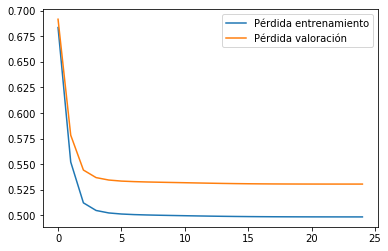

In [8]:
plt.plot(perdidas_entren, label="Pérdida entrenamiento")
plt.plot(perdidas_test, label="Pérdida valoración")
plt.legend()
plt.show()

## Conclusión

En el siguiente script implementaremos una técnica con idénticos resultados pero mucho más eficiente.